In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/My Drive/Thesis/Data - Sheet1.csv"
data = pd.read_csv(path)

In [ ]:
data.head()

,SL.,Comment,Hate,Type
0,1,Kanki ki der Allah sob samoy valo rake,Yes,Others
1,2,khanki akta,Yes,Sexual
2,3,Ore saniliyon,Yes,Sexual
3,4,Bokachoda Shangbadik,Yes,Slang
4,5,Balda dekhaiche,Yes,Slang


In [ ]:
!pip install -q wordcloud
import wordcloud
import nltk
import sklearn.metrics as metrics
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

import io
import unicodedata
import string
import re
from sklearn import metrics
import itertools
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import precision_score
from wordcloud import WordCloud


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
data['Hate'].isnull().sum()

0

In [ ]:
x = data.drop(['Hate','Type'], axis=1)
y = data['Hate']
#x.head()
#y.head()

In [ ]:
print(x.shape)
print(y.shape)

(5000, 2)
(5000,)


In [ ]:
texts=x.copy()

In [ ]:
texts['Comment'][2913]

'Notun deksen to j meyra harrest kortese kono chele k tai jonno e,jokhon rape hoy,alakay kono mey k harrest kora hoy!!!'

In [ ]:
import re
# Cleaning the texts
corpus = []
for i in range(0,len(texts)):
    review = re.sub('[^a-zA-Z]', ' ',str(texts['Comment'][i]))
    review = review.lower()
    review = review.split()
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[2913]

'notun deksen to j meyra harrest kortese kono chele k tai jonno e jokhon rape hoy alakay kono mey k harrest kora hoy'

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#CounterVectorizer
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=8000,ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

accuracy:   0.717
precision: 0.7158110206110665
recall: 0.717
fscore: 0.7138385760741471
support: None
Confusion matrix, without normalization


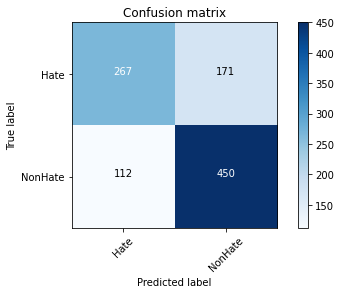

In [ ]:
from sklearn.linear_model import LogisticRegression
lgc=LogisticRegression()
lgc.fit(X_train, y_train)
pred = lgc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.75
precision: 0.751596387987013
recall: 0.752
fscore: 0.7495382251248559
support: None
Confusion matrix, without normalization


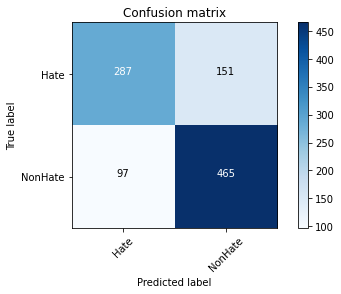

In [ ]:
### MultinomialNB Algorithm

from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(X_train, y_train)
pred = MNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred, average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.67
precision: 0.681289022556391
recall: 0.669
fscore: 0.6700669496540765
support: None
Confusion matrix, without normalization


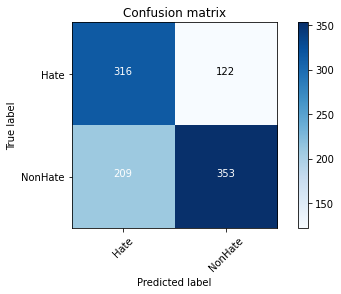

In [ ]:
### GaussianNB Algorithm

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
pred = GNB.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted',zero_division=0)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.631
precision: 0.6363280149978194
recall: 0.631
fscore: 0.6021157628237644
support: None
Confusion matrix, without normalization


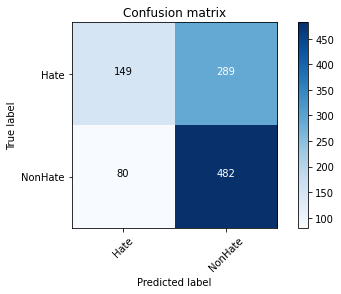

In [ ]:
### AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ada= AdaBoostClassifier()
ada.fit(X_train, y_train)
pred = ada.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.61
precision: 0.6583795607797297
recall: 0.611
fscore: 0.5352200111741894
support: None
Confusion matrix, without normalization


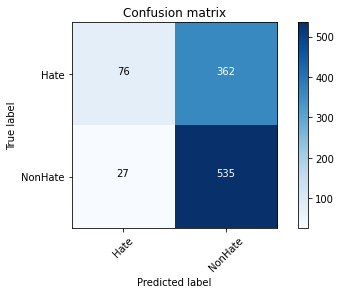

In [ ]:
### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)
pred = dc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.2f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.704
precision: 0.7023252840909091
recall: 0.704
fscore: 0.7010617525683766
support: None
Confusion matrix, without normalization


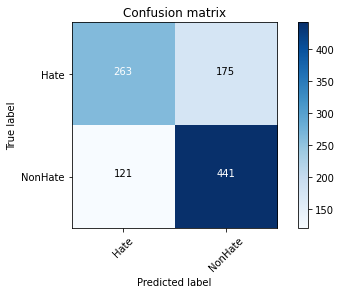

In [ ]:
### RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
pred = rf_model.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])

accuracy:   0.707
precision: 0.705490915720258
recall: 0.707
fscore: 0.7055574784190168
support: None
Confusion matrix, without normalization


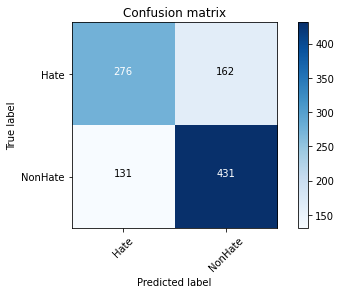

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1,kernel='linear',gamma = 'auto',probability=True)
svc.fit(X_train, y_train)
pred = svc.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, pred,average='weighted')
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['Hate', 'NonHate'])